In [1]:
import sys
sys.path.append('C:\Program Files\Anaconda3\Lib\site-packages')

In [2]:
import pandas as pd
import re
import sklearn

from stop_words import get_stop_words
stopwords = get_stop_words('russian')
import numpy as np

In [3]:
from tqdm import tqdm_notebook

In [4]:
def slurp(path):
    with open(path, 'r', encoding = 'utf-8') as file_object:
        return file_object.read()

In [16]:
metadata = pd.read_csv('nazirov-texts-dataset-master/metatable.tsv', encoding = 'utf-8', sep = '\t')

In [17]:
metadata['date'] = metadata['date'].fillna(0).astype(int)

In [18]:
metadata

,path,published,genre,topic,title,date
0,diary/2016_2_02_diary_1950.txt,no,diary,everything,Дневник за 1950,1950
1,diary/2018_1_01_diary_1951.txt,no,diary,everything,Дневник за 1951,1951
2,diary/2016_2_03_diary_1956.txt,no,diary,everything,Дневник за 1956,1956
3,diary/2016_2_04_diary_1957.txt,no,diary,everything,Дневник за 1957,1957
4,diary/2016_3_02_diary_1958.txt,no,diary,everything,Дневник за 1958,1958
5,diary/2016_3_03_diary_1963.txt,no,diary,everything,Дневник за 1963,1963
6,diary/2016_3_04_diary_1964.txt,no,diary,everything,Дневник за 1964,1964
7,diary/2018_1_diary1953.txt,no,diary,everything,Дневник за 1953,1953
8,Diary/2018_1_diary1954,no,diary,everything,Дневник за 1954,1954
9,diary/na16.txt,no,diary,everything,Дневник за 1952,1952


In [17]:
metadata.path[0].split('.')[0].split('.')

['diary/2016_2_02_diary_1950']

In [21]:
foldername = 'nazirov-texts-dataset-master/'

texts = []
for path in tqdm_notebook(metadata.path):
    if len(path.split('.')) == 1:
        path += '.txt'
    path = path.replace('Diary','diary').replace('compromis', 'compomis')
    texts.append(slurp(foldername + path))

In [22]:
metadata['text'] = texts

In [23]:
metadata.shape

(110, 7)

In [24]:
metadata_raw = metadata.copy()

In [26]:
metadata_raw.to_csv('raw_texts_meta.tsv', sep='\t', encoding='utf-8', index=False)

#### Предобработка

In [27]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [33]:
def preprocess(texts, stopwords):
    clean_texts = []
    for text in tqdm_notebook(texts):
        words = re.findall(r'[a-zа-яё]+', text.replace('-\n','').lower())#разделяем на токены
        lemmas = [morph.parse(word)[0].normal_form for word in words if word not in stopwords]
        clean_texts.append(' '.join(lemmas))
    return clean_texts

In [37]:
clean = preprocess(metadata.text, stopwords)

In [39]:
metadata['text'] = clean

In [41]:
metadata.to_csv('texts_lemm_meta.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [45]:
metadata.topic.unique()


array(['everything', 'Dostoevsky', 'literature', 'myth'], dtype=object)

#### Текстовая близость

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
metadata = pd.read_csv('texts_lemm_meta.tsv', sep = '\t')

In [52]:
#tfidf_vect = TfidfVectorizer()
tfidf_vect = TfidfVectorizer(min_df = 2, stop_words = stopwords, max_features=15000)
tfidf_vectorized = tfidf_vect.fit_transform(metadata.text)

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [53]:
feature_names = tfidf_vect.get_feature_names()
print(len(feature_names))#vocabulary size if no dimension reduction is made

15000


In [54]:
from sklearn.metrics.pairwise import cosine_similarity

In [55]:
cosine_matr = cosine_similarity(tfidf_vectorized)

In [56]:
np.save('cosine_matr.npy', cosine_matr)
#d = np.load('cosine_matr.npy')

In [5]:
cosine_matr = np.load('cosine_matr.npy')

In [6]:
cosine_matr.shape

(110, 110)

In [58]:
cosine_matr

array([[1.        , 0.21636142, 0.08120092, ..., 0.13201583, 0.04344791,
        0.05676511],
       [0.21636142, 1.        , 0.24117513, ..., 0.3014647 , 0.07741084,
        0.1394528 ],
       [0.08120092, 0.24117513, 1.        , ..., 0.18150927, 0.08874519,
        0.10737593],
       ...,
       [0.13201583, 0.3014647 , 0.18150927, ..., 1.        , 0.10364613,
        0.21630043],
       [0.04344791, 0.07741084, 0.08874519, ..., 0.10364613, 1.        ,
        0.05765537],
       [0.05676511, 0.1394528 , 0.10737593, ..., 0.21630043, 0.05765537,
        1.        ]])

In [59]:
cosine_matr.mean()

0.10989354015724664

In [60]:
num_texts = cosine_matr.shape[0]
mask = np.ones((num_texts,num_texts)) 
mask = (mask - np.diag(np.ones(num_texts))).astype(np.bool)

In [61]:
np.amax(cosine_matr[mask])

0.9995865700171643

In [5]:
# Дубли

In [7]:
i, j = np.where(cosine_matr >= 0.99)
k = []
#print('Equal texts: ',len(i))
for i_num, j_num in zip(i,j):
    if i_num < j_num:
        k.append((i_num, j_num))

In [8]:
k

[(18, 85)]

In [9]:
metadata.text[18]

'специфика художественный мифотворчество ф достоевский сравнительно исторический подход р назир специфика художественный мифотворчество ф достоевский сравнительно исторический подход i миф универсальный форма осмысление действительность составляять основа искусство исторически изменчивый неправомерно сводить понятие миф архаический мифология классический свод греция библия придавать мифология историзовать форма следовать вторичный мифотворчество ранний христианство итог средний век выразиться мифологический синтез данте шекспир создать собственный мифологический система который гейне назвать светский библия философ век разум изгнать миф европейский литература демифологизация сопротивляться роман продолжать развитие миф скрытый вид бессознательный мифотворец автор робинзона крузый кларисса гарлоу сторона векфильдский священник вариант пасторальный миф мифологический самоопределение европейский культура фауст гете субъективно мифотворчество гельдерлин поздний гимн гениальный поэт изобраз

In [10]:
metadata.text[85]

'р назир специфика художественный мифотворчество ф достоевский сравнительно исторический подход i миф универсальный форма осмысление действительность составляять основа искусство исторически изменчивый неправомерно сводить понятие миф архаический мифология классический свод греция библия придавать мифология историзовать форма следовать вторичный мифотворчество ранний христианство итог средний век выразиться мифологический синтез данте шекспир создать собственный мифологический система который гейне назвать светский библия философ век разум изгнать миф европейский литература демифологизация сопротивляться роман продолжать развитие миф скрытый вид бессознательный мифотворец автор робинзона крузый кларисса гарлоу сторона векфильдский священник вариант пасторальный миф мифологический самоопределение европейский культура фауст гете субъективно мифотворчество гельдерлин поздний гимн гениальный поэт изобразить христос последний олимпийский бог молодая шеллинга объявить задача поэт создание со

In [72]:
metadata.iloc[18]

path                        dostoevsky/nazirov-comparative.txt
published                                                  yes
genre                                                  article
topic                                               Dostoevsky
title        Специфика художественного мифотворчества Ф. М....
date                                                      1999
text         специфика художественный мифотворчество ф дост...
Name: 18, dtype: object

In [73]:
metadata.iloc[85]

path         myth/Specifika_hudozhestvennogo_mifotvorchestv...
published                                                  yes
genre                                                  article
topic                                                     myth
title        Специфика художественного мифотворчества Ф. М....
date                                                      1999
text         р назир специфика художественный мифотворчеств...
Name: 85, dtype: object

In [44]:
i, j = np.where((cosine_matr > 0.5)&(cosine_matr < 0.999))
print('Close texts: ',len(i))

Close texts:  80


In [45]:
print(list(zip(i,j)))

[(1, 9), (3, 4), (3, 6), (3, 7), (3, 8), (4, 3), (5, 6), (6, 3), (6, 5), (7, 3), (7, 8), (8, 3), (8, 7), (9, 1), (10, 13), (10, 17), (11, 17), (11, 32), (12, 13), (12, 14), (12, 17), (13, 10), (13, 12), (13, 14), (13, 17), (13, 18), (13, 20), (13, 25), (13, 29), (13, 33), (13, 85), (14, 12), (14, 13), (14, 17), (14, 33), (16, 17), (17, 10), (17, 11), (17, 12), (17, 13), (17, 14), (17, 16), (17, 18), (17, 25), (17, 29), (17, 30), (17, 31), (17, 33), (17, 85), (18, 13), (18, 17), (20, 13), (22, 51), (25, 13), (25, 17), (25, 42), (29, 13), (29, 17), (30, 17), (30, 31), (31, 17), (31, 30), (32, 11), (33, 13), (33, 14), (33, 17), (42, 25), (43, 51), (51, 22), (51, 43), (64, 70), (70, 64), (72, 87), (85, 13), (85, 17), (87, 72), (102, 106), (103, 104), (104, 103), (106, 102)]


In [42]:
metadata_raw.iloc[11]

path                           dostoevsky/2013_2_6-83_besy.txt
published                                                   no
genre                                                monograph
topic                                               Dostoevsky
title        Материалы к монографии о романе Ф. М. Достоевс...
date                                                      1973
text                  Р. Г. Назиров\n\n\n<Материалы к моног...
Name: 11, dtype: object

In [35]:
print(metadata_raw.iloc[4].text[:2000])

Из дневника 1958 года

Р. Г. Назиров



   6 января. Уфа. Новый год встречал у Вити Торопчина. Было очень
скучно.
   На следующий день после моего приезда в Уфу (я приехал 28 декаб-
ря) в воскресном номере «Советской Башкирии» появился мой рассказ
«Грубая ошибка». За него выписали 500 рублей, получил я на руки 462
рубля с копейками. Завтра в «Ленинце» выйдет моя рецензия на новый
фильм «Дом, в котором я живу». Рецензии я придумал хорошее назва-
ние — «Оружье цело». Это слова из знаменитого стихотворения Гейне
«Enfant perdu». Рецензию я начал необычно: заключительной строфой
этого стихотворения. Фильм я оцениваю положительно.
   Сегодня я более 7 часов провёл в республиканской библиотеке над
книгой Гонкуров «L’art du dix-huiti´eme si`ecle». Меня интересует Ватто.
За два посещения (в первый раз часов шесть) я перевёл в отрывках
главу о Ватто, биографию художника, прочитанную Кэйлюсом в Акаде-
мии в 1748 году, и «Notules». Давно у меня не было такого праздника.
Во-первых, каждая фраза сод

In [57]:
cos_measures = []
i, j = np.where((cosine_matr > 0.5)&(cosine_matr < 0.999))
for i_num, j_num in zip(i,j):
    #if i_num != j_num:
    cos_measures.append(cosine_matr[i_num][j_num])

In [58]:
len(i)

80

In [59]:
cos_df = pd.DataFrame({'text1':i, 'text2':j, 'similarity':cos_measures})
cos_df = cos_df[['text1', 'text2', 'similarity']]

In [116]:
topic_map = dict(zip(metadata.index, metadata.topic))
title_map = dict(zip(metadata.index, metadata.title))

cos_df = cos_df.assign(topic1 = pd.Series([topic_map[text1_ind] for text1_ind in cos_df.text1]).values)
cos_df = cos_df.assign(topic2 = pd.Series([topic_map[text2_ind] for text2_ind in cos_df.text2]).values)

cos_df = cos_df.assign(title1 = pd.Series([title_map[text1_ind] for text1_ind in cos_df.text1]).values)
cos_df = cos_df.assign(title2 = pd.Series([title_map[text2_ind] for text2_ind in cos_df.text2]).values)

Близкие тексты разных тематик

In [117]:
cos_df[(cos_df.topic1 != cos_df.topic2)&(cos_df.text1 < cos_df.text2)]

,text1,text2,similarity,topic1,topic2,title1,title2
30,13,85,0.537958,Dostoevsky,myth,Проблема художественности Ф.М. Достоевского,Специфика художественного мифотворчества Ф. М....
48,17,85,0.584559,Dostoevsky,myth,Творческие принципы Достоевского,Специфика художественного мифотворчества Ф. М....
52,22,51,0.743842,Dostoevsky,literature,Владимир Одоевский и Достоевский,О месте Одоевского в русской литературе
55,25,42,0.500826,Dostoevsky,literature,Равноправие автора и героя в творчестве Достое...,Автономия литературного героя


In [118]:
cos_df.to_csv('cos_similar_texts_05.tsv', sep = '\t', index = False, encoding = 'utf-8')

In [11]:
cos_df = pd.read_csv('cos_similar_texts_05.tsv', sep = '\t', encoding = 'utf-8')

In [12]:
%matplotlib inline
from matplotlib import pyplot as plt

In [13]:
cos_links = cos_df[cos_df.text1 < cos_df.text2]

In [14]:
cos_links.shape

(40, 7)

In [15]:
cos_links

,text1,text2,similarity,topic1,topic2,title1,title2
0,1,9,0.555429,everything,everything,Дневник за 1951,Дневник за 1952
1,3,4,0.569965,everything,everything,Дневник за 1957,Дневник за 1958
2,3,6,0.532000,everything,everything,Дневник за 1957,Дневник за 1964
3,3,7,0.529923,everything,everything,Дневник за 1957,Дневник за 1953
4,3,8,0.570650,everything,everything,Дневник за 1957,Дневник за 1954
6,5,6,0.523620,everything,everything,Дневник за 1963,Дневник за 1964
10,7,8,0.551836,everything,everything,Дневник за 1953,Дневник за 1954
14,10,13,0.557768,Dostoevsky,Dostoevsky,К вопросу об автобиографичности романа Ф.М. До...,Проблема художественности Ф.М. Достоевского
15,10,17,0.602377,Dostoevsky,Dostoevsky,К вопросу об автобиографичности романа Ф.М. До...,Творческие принципы Достоевского
16,11,17,0.538543,Dostoevsky,Dostoevsky,Материалы к монографии о романе Ф. М. Достоевс...,Творческие принципы Достоевского


In [16]:
edges = pd.DataFrame({'source' : cos_links.text1.values,
                      'target' : cos_links.text2.values,
                      'weight' : cos_links.similarity.values})

In [17]:
import networkx as nx

In [18]:
g = nx.DiGraph()

# open csv edgelist and read edges into graph
for index, row in edges.iterrows():
    g.add_edge(row['source'], row['target'], weight = row['weight'])

pos = nx.spring_layout(g)

# draw network without node color
#nx.draw(g, pos, with_labels=False, node_size=25, arrows = False)

In [27]:
texts = list(cos_links.text1.values) + list(cos_links.text2.values)
topics = list(cos_links.topic1.values) + list(cos_links.topic2.values)
titles = list(cos_links.title1.values) + list(cos_links.title2.values)
texts_topics = list(zip(texts, topics, titles))
texts_topics = list(set(texts_topics))

texts, topics, titles = zip(*texts_topics)

nodes = pd.DataFrame({'node' : texts,
                      'rubric' : topics,
                     'title': titles})

In [30]:
set(metadata_raw.topic)

{'Dostoevsky', 'everything', 'literature', 'myth'}

In [31]:
rubric_colors = {
    'Dostoevsky':'blue',
    'everything':'green',
    'literature':'yellow',
    'myth':'magenta'
}

In [32]:
rubric_attribute = []
title_attribute = []

for index, row in nodes.iterrows():
    rubric_attribute.append((row['node'], row['rubric']))
    title_attribute.append((row['node'], row['title']))
    
rubric_dictionary = dict(rubric_attribute)
title_attribute = dict(title_attribute)

nx.set_node_attributes(g, "rubric", rubric_dictionary)
nx.set_node_attributes(g, "title", title_attribute)

In [33]:
node_col = []

for node in g.nodes(data=True):
    topic_attr = node[1]['rubric']
    node_col.append(rubric_colors[topic_attr])
    #print(node[1]['rubric'])

In [34]:
labels = nx.get_node_attributes(g, 'title')

C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Program Files\Anaconda3\envs\mllecture\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed

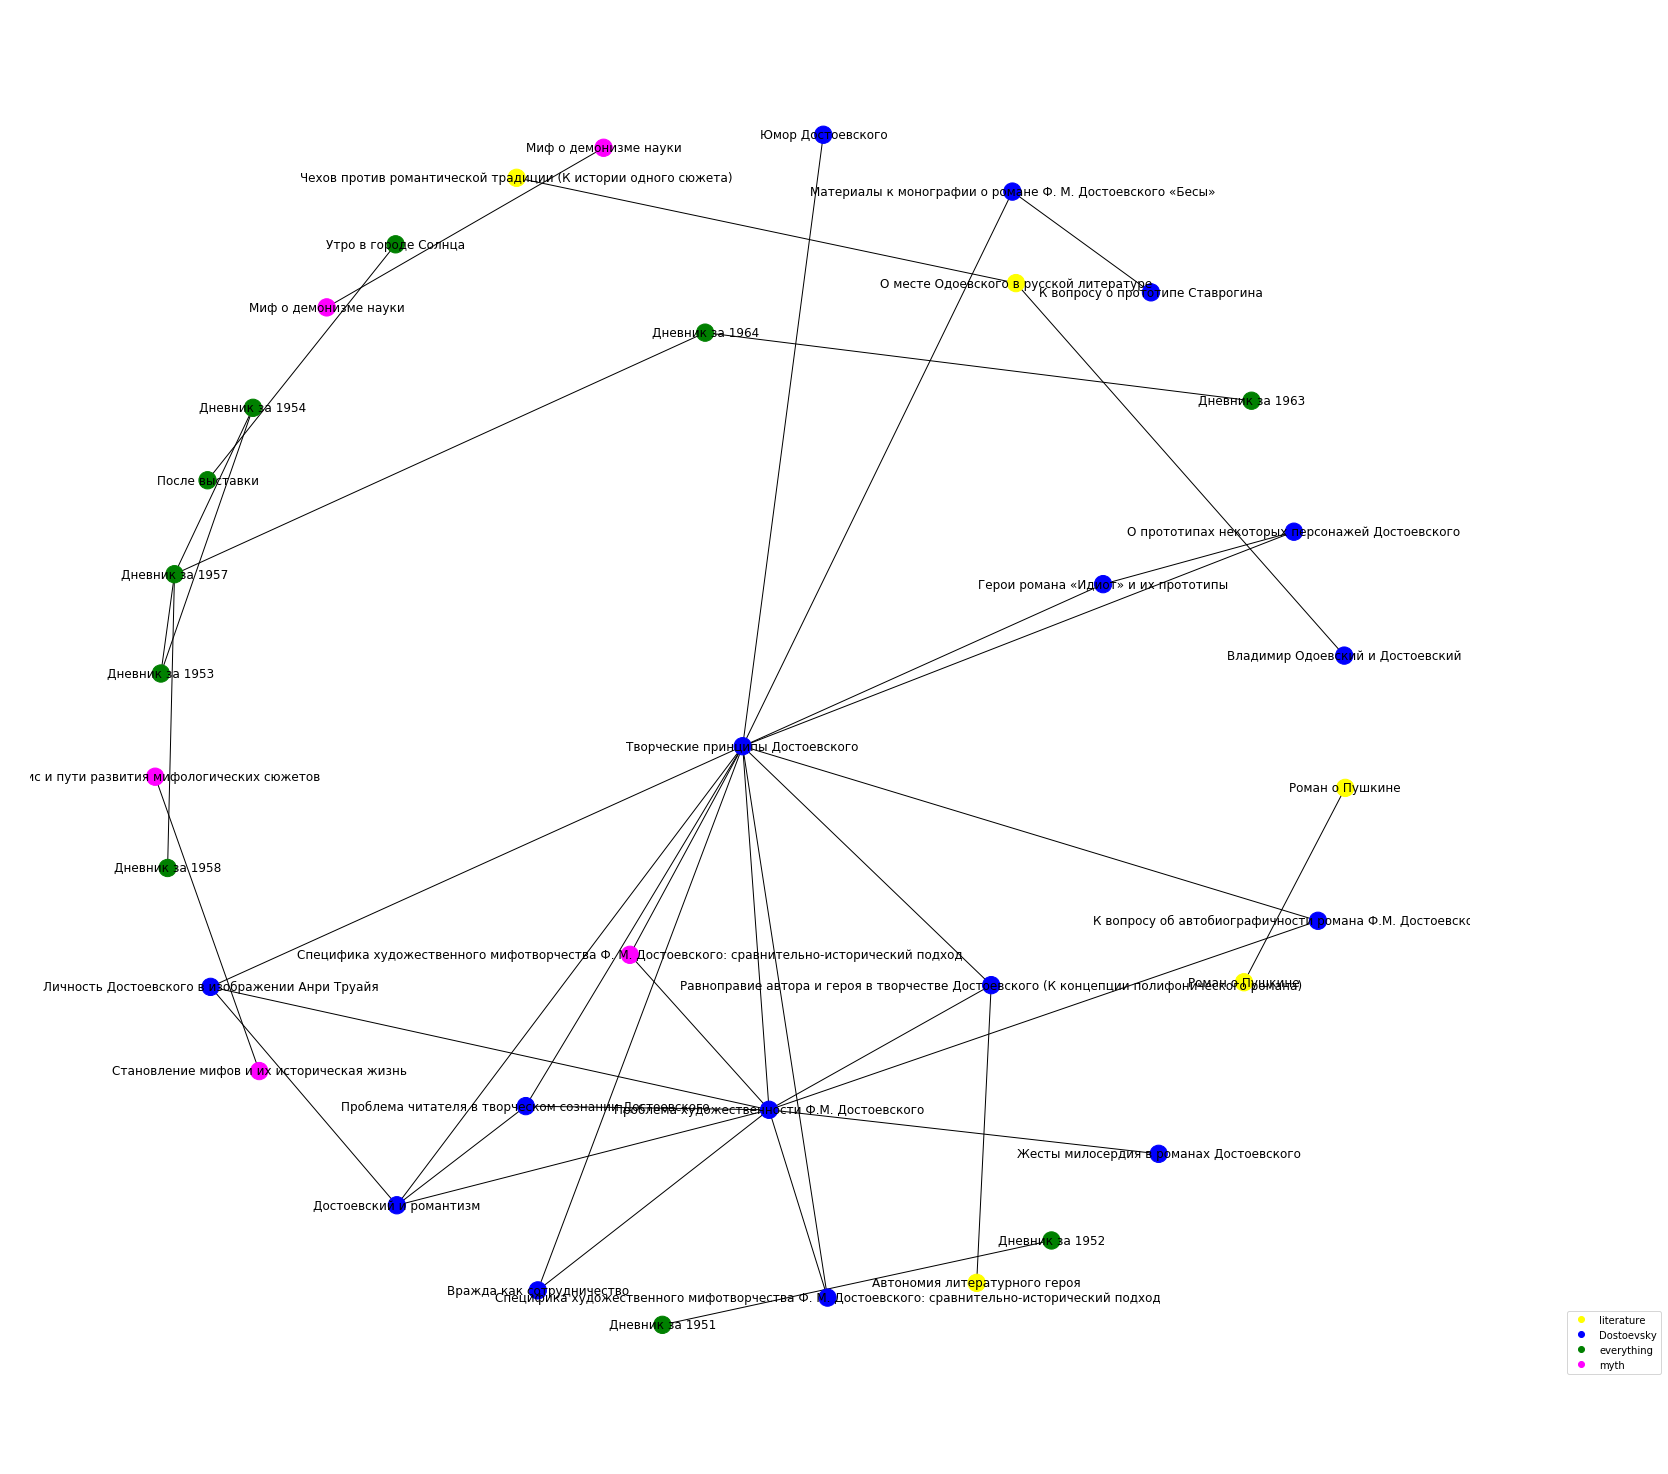

In [35]:
plt.figure(figsize=(20,20))
labels = nx.get_node_attributes(g, 'title')
nx.draw(g,labels = labels, node_size=300,node_color=node_col, arrows = False)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in rubric_colors.values()]
plt.legend(markers, rubric_colors.keys(), numpoints=1, loc=9, bbox_to_anchor=(1.1, 0.1))
plt.axis('equal')
plt.savefig("text_similarity_graph.png")
plt.show()

In [36]:
print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 36
Number of edges: 40
Average in degree:   1.1111
Average out degree:   1.1111


Из коллекции текстов Р.Г. Назирова с точки зрения текстовой близости наибольшее количество связей образуют тексты о Ф.М. Достоевском. Можно увидеть пересечения в исследованиях творчества Достоевского и мифологии (статьи "Проблема художественности Ф.М. Достоевского", "Творческие принципы Достоевского" и "Специфика художественного мифотворчества Ф.М. Достоевского: сравнительно-исторический подход"), в статьях о Достоевском и литературе ("Владимир Одоевский и Достоевский" и "О месте Одоевского в русской литературе", "Равноправие автора и героя в творчестве Достоевского (К концепции полифонического романа)" и "Автономия литературного героя"). Также близки между собой дневники 1951-1952 гг. и более поздних лет 1953-1964 гг. 